# 1. 生成25天的时间序列

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# test1 = pd.read_csv('data/Metro_testA/testA_submit_2019-01-29.csv')
# test1['hour'] = test1['startTime'].apply(lambda x : x[11:16])

## 拼接25天的数据-stationID

In [3]:
## 拼接25天的数据
path = 'data/Metro_train/'
fileList = os.listdir(path) 
def genDaysSeries(fileList):
    days = pd.DataFrame()
    for f in fileList:
        print('------------开始计算:',f,'----------------')
        ## 读取数据
        df=pd.read_csv(path+f)
        df['time'] = df['time'].apply(lambda x : x[:15]+'0')

        ## out
        df0 = pd.DataFrame()
        g = df[df['status']==0].groupby(['time','lineID','stationID'])
        df0 = g.agg({'status':'count','deviceID':'nunique','userID':'nunique'})
        df0.columns = ['outCount','outDevices','outUsers']
        df0.reset_index(drop=False,inplace=True)

        ## in
        df1 = pd.DataFrame()
        g = df[df['status']==1].groupby(['time','lineID','stationID'])
        df1 = g.agg({'status':'count','deviceID':'nunique','userID':'nunique'})
        df1.columns = ['inCount','inDevices','inUsers']
        df1.reset_index(drop=False,inplace=True)
    
        day = df0.merge(df1,on=['time','lineID','stationID'])
        days = pd.concat([days,day],axis=0)
    return days

------------开始计算: record_2019-01-01.csv ----------------
------------开始计算: record_2019-01-02.csv ----------------
------------开始计算: record_2019-01-03.csv ----------------
------------开始计算: record_2019-01-04.csv ----------------
------------开始计算: record_2019-01-05.csv ----------------
------------开始计算: record_2019-01-06.csv ----------------
------------开始计算: record_2019-01-07.csv ----------------
------------开始计算: record_2019-01-08.csv ----------------
------------开始计算: record_2019-01-09.csv ----------------
------------开始计算: record_2019-01-10.csv ----------------
------------开始计算: record_2019-01-11.csv ----------------
------------开始计算: record_2019-01-12.csv ----------------
------------开始计算: record_2019-01-13.csv ----------------
------------开始计算: record_2019-01-14.csv ----------------
------------开始计算: record_2019-01-15.csv ----------------
------------开始计算: record_2019-01-16.csv ----------------
------------开始计算: record_2019-01-17.csv ----------------
------------开始计算: record_2019-0

## 拼接25天的数据-lineID

In [26]:
## 拼接25天的数据
path = 'data/Metro_train/'
fileList = os.listdir(path) 
def linesSeries(fileList):
    lines = pd.DataFrame()
    for f in fileList:
        print('------------开始计算:',f,'----------------')
        ## 读取数据
        df=pd.read_csv(path+f)
        df['time'] = df['time'].apply(lambda x : x[:15]+'0')

        ## out
        df0 = pd.DataFrame()
        g = df[df['status']==0].groupby(['time','lineID'])
        df0 = g.agg({'status':'count','deviceID':'nunique','userID':'nunique'})
        df0.columns = ['outCount','outDevices','outUsers']
        df0.reset_index(drop=False,inplace=True)

        ## in
        df1 = pd.DataFrame()
        g = df[df['status']==1].groupby(['time','lineID'])
        df1 = g.agg({'status':'count','deviceID':'nunique','userID':'nunique'})
        df1.columns = ['inCount','inDevices','inUsers']
        df1.reset_index(drop=False,inplace=True)
    
        day = df0.merge(df1,on=['time','lineID'])
        lines = pd.concat([lines,day],axis=0)
    return lines

------------开始计算: record_2019-01-01.csv ----------------
------------开始计算: record_2019-01-02.csv ----------------
------------开始计算: record_2019-01-03.csv ----------------
------------开始计算: record_2019-01-04.csv ----------------
------------开始计算: record_2019-01-05.csv ----------------
------------开始计算: record_2019-01-06.csv ----------------
------------开始计算: record_2019-01-07.csv ----------------
------------开始计算: record_2019-01-08.csv ----------------
------------开始计算: record_2019-01-09.csv ----------------
------------开始计算: record_2019-01-10.csv ----------------
------------开始计算: record_2019-01-11.csv ----------------
------------开始计算: record_2019-01-12.csv ----------------
------------开始计算: record_2019-01-13.csv ----------------
------------开始计算: record_2019-01-14.csv ----------------
------------开始计算: record_2019-01-15.csv ----------------
------------开始计算: record_2019-01-16.csv ----------------
------------开始计算: record_2019-01-17.csv ----------------
------------开始计算: record_2019-0

In [28]:
lines.to_csv('data/lines.csv',header=True,index=False)

In [27]:
lines.head()

,time,lineID,outCount,outDevices,outUsers,inCount,inDevices,inUsers
0,2019-01-01 02:00,A,1,1,1,1,1,1
1,2019-01-01 02:00,B,8,7,7,5,5,4
2,2019-01-01 02:00,C,1,1,1,4,4,4
3,2019-01-01 02:10,B,1,1,1,5,3,5
4,2019-01-01 02:10,C,6,5,5,3,2,3


In [8]:
days.to_csv("data/days.csv",header=True,index=False)

In [19]:
line.reset_index(drop=False,inplace=True)
line.head()

,time,inCount,outCount
0,2019-01-01 02:00,1,1
1,2019-01-01 02:50,1,1
2,2019-01-01 03:00,1,1
3,2019-01-01 05:30,3,1
4,2019-01-01 05:40,36,6


In [17]:
line = data.groupby('time').agg({'inCount':'sum','outCount':'sum'})
line.sort_index()
line.head()

,inCount,outCount
time,,
2019-01-01 02:00,1,1
2019-01-01 02:50,1,1
2019-01-01 03:00,1,1
2019-01-01 05:30,3,1
2019-01-01 05:40,36,6


In [5]:
# lineID_A = record1[record1['lineID']=='A']
lineID_A = record1[record1['lineID']=='C']

lineID_A.sort_values(by='time',inplace=True)
lineID_A.reset_index(drop=True,inplace=True)

lineID_A['time2'] = lineID_A['time'].apply(lambda x : x[:15])


data_A = pd.DataFrame()
g_A = lineID_A.groupby('time2')
data_A['out'] = g_A['status'].sum()
data_A['count'] = g_A['status'].count()

data_A.reset_index(inplace=True)

D:\programfiles\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\programfiles\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


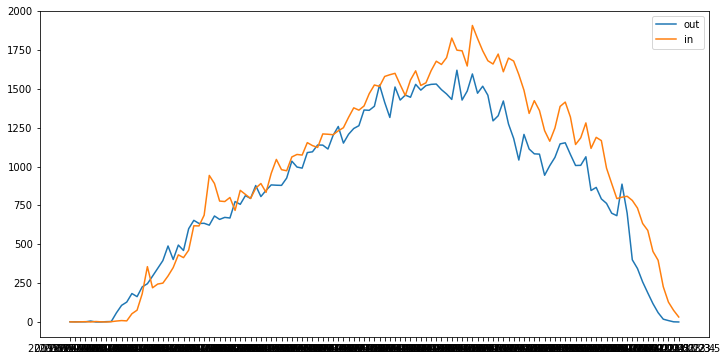

In [32]:
plt.figure(figsize=(12,6))
plt.plot(data_A['time2'],data_A['out'],label='out')
plt.plot(data_A['time2'],(data_A['count']-data_A['out']),label='in')
plt.legend()
plt.show()

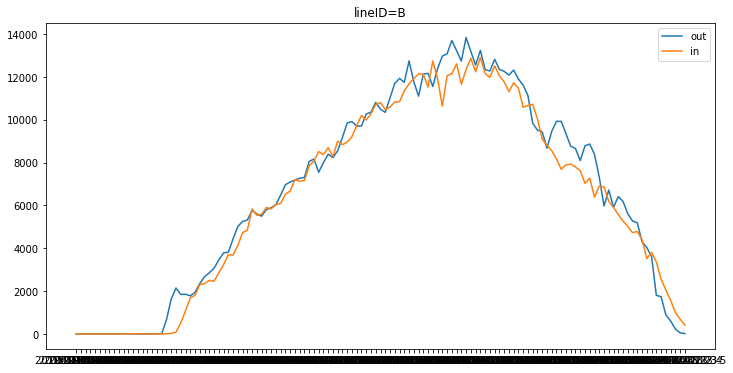

In [34]:
plt.figure(figsize=(12,6))
plt.plot(data_A['time2'],data_A['out'],label='out')
plt.plot(data_A['time2'],(data_A['count']-data_A['out']),label='in')
plt.legend()
plt.title('lineID=B')
plt.show()

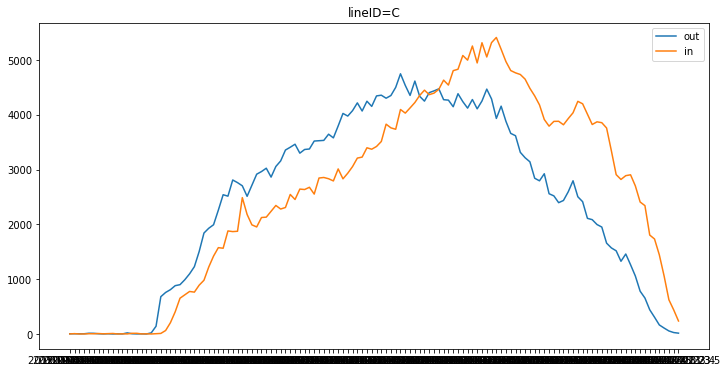

In [6]:
plt.figure(figsize=(12,6))
plt.plot(data_A['time2'],data_A['out'],label='out')
plt.plot(data_A['time2'],(data_A['count']-data_A['out']),label='in')
plt.legend()
plt.title('lineID=C')
plt.show()

# 2.数据处理